In [1]:
from sklearn.datasets import load_boston
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats
import math
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
from statsmodels.tools import add_constant as add_constant
from sklearn.metrics import r2_score

# Starting with Salary Prediction i.e. Regression model

In [2]:
df = pd.read_excel('Admission.xlsx')

In [3]:
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


In [4]:
df['Placement'].value_counts(normalize=True)

Placed        0.797954
Not Placed    0.202046
Name: Placement, dtype: float64

In [174]:
df.drop(columns=['SlNo','Salary'], axis= 1, inplace =True)

In [175]:
df.describe()

,Percent_SSC,Percent_HSC,Percent_Degree,Experience_Yrs,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,64.652353,63.795294,62.983606,0.478261,54.934962,61.667698,60.539642,68.363171,64.378517
std,10.960426,11.417726,8.916152,0.667112,31.168264,5.854399,8.824084,7.145095,9.582834
min,37.000000,40.000000,35.000000,0.000000,0.000000,50.830000,50.000000,50.000000,50.000000
25%,56.000000,54.000000,57.525000,0.000000,41.190000,57.195000,53.000000,64.000000,57.000000
50%,64.500000,63.000000,63.000000,0.000000,62.000000,61.010000,58.000000,69.000000,63.000000
75%,74.000000,72.000000,69.000000,1.000000,78.000000,66.020000,67.000000,74.000000,72.500000
max,87.200000,94.700000,89.000000,3.000000,98.690000,77.890000,88.000000,87.000000,96.000000


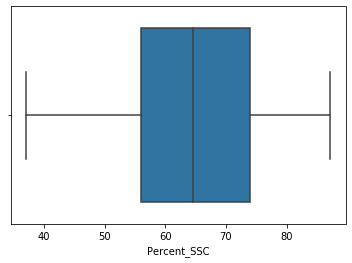

In [176]:
sns.boxplot(df['Percent_SSC'])

In [177]:
df['Entrance_Test'].fillna('NA',inplace=True)

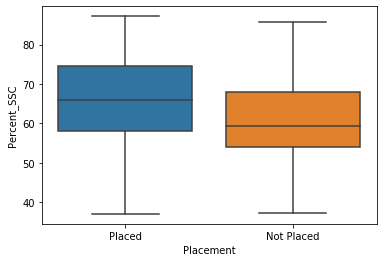

In [178]:
sns.boxplot(x = 'Placement', y = 'Percent_SSC', data=df)

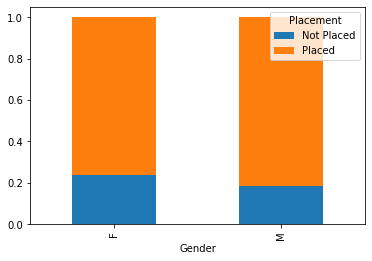

In [179]:
pd.crosstab(df['Gender'], df['Placement'], normalize = 0).plot.bar(stacked=True)

In [180]:
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt

In [181]:
df2=df.loc[:,['Percent_SSC','Percent_HSC','Percent_Degree','Percentile_ET','Percent_MBA','Marks_Communication','Marks_Projectwork','Marks_BOCA']]

In [182]:
df.head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement
0,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed
1,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed
2,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NA,0.0,52.91,Marketing & Finance,50,61,59,Placed
3,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed
4,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed


In [183]:
df2.head()

,Percent_SSC,Percent_HSC,Percent_Degree,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA
0,62.00,88.00,52.00,55.0,58.80,50,65,74
1,76.33,75.33,75.48,86.5,66.28,69,70,75
2,72.00,78.00,66.63,0.0,52.91,50,61,59
3,60.00,63.00,58.00,75.0,57.80,54,66,62
4,61.00,55.00,54.00,66.0,59.43,52,65,67


In [184]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, bagging,BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, explained_variance_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [185]:
ss = StandardScaler()
df2 = ss.fit_transform(df2)
df2 = pd.DataFrame(df2, columns = ['Percent_SSC','Percent_HSC','Percent_Degree','Percentile_ET','Percent_MBA','Marks_Communication','Marks_Projectwork','Marks_BOCA'] )

In [186]:
df.head()

,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement
0,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed
1,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed
2,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NA,0.0,52.91,Marketing & Finance,50,61,59,Placed
3,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed
4,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed


In [187]:
df2.shape

(391, 8)

In [188]:
df.shape

(391, 17)

In [189]:
df.loc[:,['Percent_SSC','Percent_HSC','Percent_Degree','Percentile_ET','Percent_MBA','Marks_Communication','Marks_Projectwork','Marks_BOCA']] = df2.loc[:,['Percent_SSC','Percent_HSC','Percent_Degree','Percentile_ET','Percent_MBA','Marks_Communication','Marks_Projectwork','Marks_BOCA']] 

In [190]:
df.shape

(391, 17)

In [191]:
cat_cols = ['Gender', 'Board_SSC', 'Entrance_Test','Board_HSC','Stream_HSC','Course_Degree','Experience_Yrs','Specialization_MBA','Placement']
df = pd.get_dummies(df, columns= cat_cols, drop_first = True)

In [192]:
df.head()

,Percent_SSC,Percent_HSC,Percent_Degree,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_M,Board_SSC_ICSE,...,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Experience_Yrs_1,Experience_Yrs_2,Experience_Yrs_3,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
0,-0.242304,2.122640,-1.233456,0.002089,-0.490464,-1.195948,-0.471300,1.005320,1,0,...,0,0,0,1,0,0,0,1,0,1
1,1.066802,1.011540,1.403341,1.014028,0.788845,0.960009,0.229378,1.109806,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0.671239,1.245686,0.409489,-1.764787,-1.497834,-1.195948,-1.031841,-0.561985,1,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.425012,-0.069744,-0.559657,0.644590,-0.661495,-0.742062,-0.331164,-0.248524,1,0,...,0,1,0,0,0,0,0,0,0,1
4,-0.333658,-0.771306,-1.008856,0.355465,-0.382715,-0.969005,-0.471300,0.273911,1,0,...,1,0,0,0,1,0,0,1,0,1


By Vif Value

In [193]:
df.head()

,Percent_SSC,Percent_HSC,Percent_Degree,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Gender_M,Board_SSC_ICSE,...,Course_Degree_Engineering,Course_Degree_Management,Course_Degree_Others,Course_Degree_Science,Experience_Yrs_1,Experience_Yrs_2,Experience_Yrs_3,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB,Placement_Placed
0,-0.242304,2.122640,-1.233456,0.002089,-0.490464,-1.195948,-0.471300,1.005320,1,0,...,0,0,0,1,0,0,0,1,0,1
1,1.066802,1.011540,1.403341,1.014028,0.788845,0.960009,0.229378,1.109806,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0.671239,1.245686,0.409489,-1.764787,-1.497834,-1.195948,-1.031841,-0.561985,1,0,...,1,0,0,0,0,0,0,0,0,1
3,-0.425012,-0.069744,-0.559657,0.644590,-0.661495,-0.742062,-0.331164,-0.248524,1,0,...,0,1,0,0,0,0,0,0,0,1
4,-0.333658,-0.771306,-1.008856,0.355465,-0.382715,-0.969005,-0.471300,0.273911,1,0,...,1,0,0,0,1,0,0,1,0,1


In [194]:
df.drop(columns = ['Entrance_Test_GCET','Board_HSC_Others','Entrance_Test_MAT','Experience_Yrs_3','Course_Degree_Commerce','Course_Degree_Management','Stream_HSC_Science'], axis=1, inplace=True)
## dropping by vif value

In [26]:
X = df.drop('Placement_Placed', axis=1 )
y= df['Placement_Placed']

In [27]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
vif['features'] = X.columns

In [28]:
vif

,vif,features
0,1.769404,Percent_SSC
1,1.682423,Percent_HSC
2,1.573939,Percent_Degree
3,3.941313,Percentile_ET
4,3.126926,Percent_MBA
5,2.359270,Marks_Communication
6,1.336227,Marks_Projectwork
7,1.534333,Marks_BOCA
8,3.262077,Gender_M
9,2.281646,Board_SSC_ICSE


# Checking the approach

In [29]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
logit_model = sm.Logit(y,Xc)
result = logit_model.fit()
result.summary()

         Current function value: 2.826075
         Iterations: 35


C:\Users\arul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Placement_Placed   No. Observations:                  391
Model:                          Logit   Df Residuals:                      363
Method:                           MLE   Df Model:                           27
Date:                Sun, 10 Nov 2019   Pseudo R-squ.:                     inf
Time:                        11:12:56   Log-Likelihood:                -1105.0
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.1342      0.469      2.418      0.016       0.215       2.053
Percent_SSC                             0.6323      0.184      3.436      0.001       0.272       0.993
Percent_HSC                            -0.1552      0.174     -0.892      0.372      -0.496       0.186
Percent_Degree                         -0.0288      0.166     -0.173      0.862      -0.354       0.296
Percentile_ET                           0.5200      0.268      1.942      0.052      -0.005       1.045
Percent_MBA                             0.1200      0.236      0.509      0.611      -0.342       0.582
Marks_Communication                    -0.3894      0.206     -1.895      0.058      -0.792       0.013
Marks_Projectwork                       0.3562      0.155      2.302      0.021       0.053       0.659
Marks_BOCA                             -0.0153      0.166     -0.092      0.926      -0.341       0.310
Gender_M                                0.5466      0.312      1.753      0.080      -0.065       1.158
Board_SSC_ICSE                         -0.2008      0.479     -0.419      0.675      -1.140       0.738
Board_SSC_Others                       -0.3797      0.340     -1.118      0.264      -1.045       0.286
Entrance_Test_G-MAT                    18.5329   1.39e+04      0.001      0.999   -2.73e+04    2.73e+04
Entrance_Test_G-SAT                    19.3989    1.4e+04      0.001      0.999   -2.74e+04    2.74e+04
Entrance_Test_K-MAT                     0.3192      0.618      0.517      0.605      -0.891       1.530
Entrance_Test_NA                        0.8993      0.644      1.396      0.163      -0.364       2.162
Entrance_Test_PGCET                    -0.9556      0.943     -1.013      0.311      -2.804       0.893
Entrance_Test_XAT                      16.6311   1.39e+04      0.001      0.999   -2.72e+04    2.72e+04
Board_HSC_ISC                          -0.1980      0.501     -0.395      0.693      -1.180       0.784
Stream_HSC_Commerce                     0.0180      0.368      0.049      0.961      -0.703       0.739
Course_Degree_Computer Applications    -0.6335      0.541     -1.170      0.242      -1.695       0.428
Course_Degree_Engineering              -0.4051      0.562     -0.720      0.471      -1.507       0.697
Course_Degree_Others                    0.1695      1.261      0.134      0.893      -2.302       2.641
Course_Degree_Science                   0.1339      0.711      0.188      0.851      -1.260       1.528
Experience_Yrs_1                        0.4256      0.326      1.304      0.192      -0.214       1.065
Experience_Yrs_2                       -0.0991      0.558     -0.178      0.859      -1.193       0.995
Specialization_MBA_Marketing & HR       0.2301      0.293      0.785      0.432      -0.344       0.804
Specialization_MBA_Marketing & IB       0.0353      0.742      0.048      0.962      -1.419       1.490
=================

# dropping collumns with P-value score

In [30]:
import statsmodels.api as sm
Xc = sm.add_constant(X)
logit_model = sm.Logit(y,Xc)
result = logit_model.fit()
result.summary()

         Current function value: 2.826075
         Iterations: 35


C:\Users\arul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\arul\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Placement_Placed   No. Observations:                  391
Model:                          Logit   Df Residuals:                      363
Method:                           MLE   Df Model:                           27
Date:                Sun, 10 Nov 2019   Pseudo R-squ.:                     inf
Time:                        11:12:56   Log-Likelihood:                -1105.0
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.1342      0.469      2.418      0.016       0.215       2.053
Percent_SSC                             0.6323      0.184      3.436      0.001       0.272       0.993
Percent_HSC                            -0.1552      0.174     -0.892      0.372      -0.496       0.186
Percent_Degree                         -0.0288      0.166     -0.173      0.862      -0.354       0.296
Percentile_ET                           0.5200      0.268      1.942      0.052      -0.005       1.045
Percent_MBA                             0.1200      0.236      0.509      0.611      -0.342       0.582
Marks_Communication                    -0.3894      0.206     -1.895      0.058      -0.792       0.013
Marks_Projectwork                       0.3562      0.155      2.302      0.021       0.053       0.659
Marks_BOCA                             -0.0153      0.166     -0.092      0.926      -0.341       0.310
Gender_M                                0.5466      0.312      1.753      0.080      -0.065       1.158
Board_SSC_ICSE                         -0.2008      0.479     -0.419      0.675      -1.140       0.738
Board_SSC_Others                       -0.3797      0.340     -1.118      0.264      -1.045       0.286
Entrance_Test_G-MAT                    18.5329   1.39e+04      0.001      0.999   -2.73e+04    2.73e+04
Entrance_Test_G-SAT                    19.3989    1.4e+04      0.001      0.999   -2.74e+04    2.74e+04
Entrance_Test_K-MAT                     0.3192      0.618      0.517      0.605      -0.891       1.530
Entrance_Test_NA                        0.8993      0.644      1.396      0.163      -0.364       2.162
Entrance_Test_PGCET                    -0.9556      0.943     -1.013      0.311      -2.804       0.893
Entrance_Test_XAT                      16.6311   1.39e+04      0.001      0.999   -2.72e+04    2.72e+04
Board_HSC_ISC                          -0.1980      0.501     -0.395      0.693      -1.180       0.784
Stream_HSC_Commerce                     0.0180      0.368      0.049      0.961      -0.703       0.739
Course_Degree_Computer Applications    -0.6335      0.541     -1.170      0.242      -1.695       0.428
Course_Degree_Engineering              -0.4051      0.562     -0.720      0.471      -1.507       0.697
Course_Degree_Others                    0.1695      1.261      0.134      0.893      -2.302       2.641
Course_Degree_Science                   0.1339      0.711      0.188      0.851      -1.260       1.528
Experience_Yrs_1                        0.4256      0.326      1.304      0.192      -0.214       1.065
Experience_Yrs_2                       -0.0991      0.558     -0.178      0.859      -1.193       0.995
Specialization_MBA_Marketing & HR       0.2301      0.293      0.785      0.432      -0.344       0.804
Specialization_MBA_Marketing & IB       0.0353      0.742      0.048      0.962      -1.419       1.490
=================

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

In [32]:
X_train.shape

(273, 27)

In [33]:
y_train.shape

(273,)

In [34]:
y_train.value_counts()

1    218
0     55
Name: Placement_Placed, dtype: int64

In [35]:
X_test.shape

(118, 27)

In [36]:
y_test.shape

(118,)

In [37]:
y_test.value_counts()

1    94
0    24
Name: Placement_Placed, dtype: int64

In [38]:
y_test.head()

210    1
146    1
40     1
332    1
26     1
Name: Placement_Placed, dtype: uint8

In [39]:
def model_fit(algo, X_train, y_train, X_test, y_test):
    #for train Data
    
    algo.fit(X_train, y_train)
    y_train_pred = algo.predict(X_train)
    y_train_prob = algo.predict_proba(X_train)[:,1]
    print('AUC score of Train:', roc_auc_score(y_train, y_train_prob))
    fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
    print(confusion_matrix(y_train, y_train_pred))
    
    #For test Data
    
    y_test_pred = algo.predict(X_test)
    y_test_prob = algo.predict_proba(X_test)[:,1]
    print('AUC score of Test:', roc_auc_score(y_test, y_test_prob))
    fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
    print(confusion_matrix(y_test, y_test_pred))
    
    
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    optimal_idx = np.argmax(tpr-fpr)
    print(optimal_idx)
    
    

# Logistic Regression Classification

In [123]:
lr =LogisticRegression(penalty = 'l2',random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

AUC score of Train: 0.7037531276063386
[[  2  53]
 [  2 216]]
AUC score of Test: 0.6759751773049646
[[ 0 24]
 [ 0 94]]


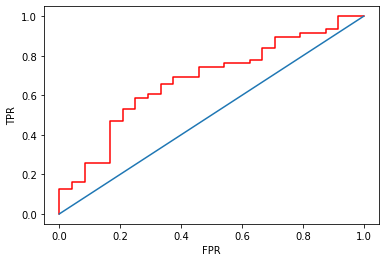

12


In [134]:
model_fit(lr, X_train, y_train, X_test, y_test)

In [135]:
y_prob = result.predict(Xc)

In [ ]:
print(np.mean(cv_results))

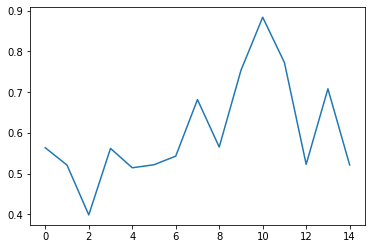

In [137]:
plt.plot(cv_results)

# Random Forest Classification Modelling

AUC score of Train: 0.9994995829858215
[[ 51   4]
 [  0 218]]
AUC score of Test: 0.6245567375886525
[[ 7 17]
 [10 84]]


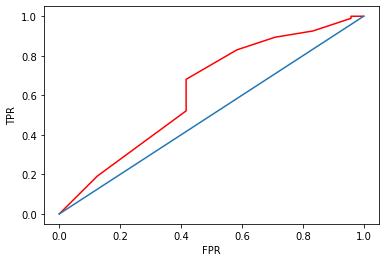

3


In [138]:
rf = RandomForestClassifier(random_state =0)
model_fit(rf, X_train, y_train, X_test, y_test )

In [139]:

Xy_train0 = Xy_train.loc[Xy_train['Placement_Placed']==0]
Xy_train1 = Xy_train.loc[Xy_train['Placement_Placed']==1]

In [140]:
len1 = len(Xy_train1)
len0 = len(Xy_train0)

In [141]:

Xy_train1_us = Xy_train1.sample(len0)



In [142]:

Xy_train_us= pd.concat([Xy_train1_us, Xy_train1], axis=0)

y_train_us =  Xy_train_us['Placement_Placed']
X_train_us = Xy_train_us.drop('Placement_Placed', axis=1)

In [143]:
print(X_train_us.shape)
print(y_train_us.value_counts())

(273, 27)
1    273
Name: Placement_Placed, dtype: int64


In [144]:
model_fit(lr, X_train_us, y_train_us, X_test, y_test)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

# Regression Modelling

In [364]:
df = pd.read_excel('Admission.xlsx')

In [365]:
df.head()
df = df[df['Placement'] == 'Placed']

In [366]:
df.drop('Placement', axis=1, inplace =True)

In [367]:
df.isnull().sum()

SlNo                    0
Gender                  0
Percent_SSC             0
Board_SSC               0
Percent_HSC             0
Board_HSC               0
Stream_HSC              0
Percent_Degree          0
Course_Degree           0
Experience_Yrs          0
Entrance_Test          51
Percentile_ET           0
Percent_MBA             0
Specialization_MBA      0
Marks_Communication     0
Marks_Projectwork       0
Marks_BOCA              0
Salary                  0
dtype: int64

In [368]:
df['Entrance_Test'].fillna('NA',inplace=True)

# Get Dummies for categorical Data

In [369]:
cat_cols = ['Gender', 'Board_SSC', 'Entrance_Test','Board_HSC','Stream_HSC','Course_Degree','Experience_Yrs','Specialization_MBA']
df = pd.get_dummies(df, columns= cat_cols, drop_first = True)

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print("Shape of the X_train: ", X_train.shape,'\n' ,'Shape of X_Test',X_test.shape)

Shape of the X_train:  (218, 23) 
 Shape of X_Test (94, 23)


In [371]:
from sklearn.feature_selection import RFE

In [372]:
model = LinearRegression()
rfe = RFE(model,10)

In [373]:
X_rfe = rfe.fit_transform(X_train, y_train)
model.fit(X_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [374]:
rfe.support_

array([False, False, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True, False,  True,  True,  True])

In [375]:
sel= pd.DataFrame([X_train.columns, rfe.ranking_]).T
sel.columns = ['cols', 'select']
sel = sel[sel['select']==1]
sel

,cols,select
7,Gender_M,1
8,Board_SSC_ICSE,1
10,Entrance_Test_G-SAT,1
11,Entrance_Test_K-MAT,1
16,Course_Degree_Computer Applications,1
17,Course_Degree_Engineering,1
18,Course_Degree_Others,1
20,Experience_Yrs_2,1
21,Specialization_MBA_Marketing & HR,1
22,Specialization_MBA_Marketing & IB,1


In [376]:
selected_columns = sel['cols'].tolist()
selected_columns

['Gender_M',
 'Board_SSC_ICSE',
 'Entrance_Test_G-SAT',
 'Entrance_Test_K-MAT',
 'Course_Degree_Computer Applications',
 'Course_Degree_Engineering',
 'Course_Degree_Others',
 'Experience_Yrs_2',
 'Specialization_MBA_Marketing & HR',
 'Specialization_MBA_Marketing & IB']

In [377]:
X_train = X_train.loc[:,selected_columns]
X_test = X_test.loc[:,selected_columns]

In [378]:
X_test.shape

(94, 10)

In [379]:
X_train.shape

(218, 10)

In [380]:
lr  = LinearRegression()
lr.fit(X_train.loc[:,selected_columns], y_train)
y_train_pred = lr.predict(X_train.loc[:,selected_columns])

In [381]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.1465052658608067


In [363]:
df.isnull().sum()

SlNo                                   0
Percent_SSC                            0
Percent_HSC                            0
Percent_Degree                         0
Percentile_ET                          0
Percent_MBA                            0
Marks_Communication                    0
Marks_Projectwork                      0
Marks_BOCA                             0
Salary                                 0
Gender_M                               0
Board_SSC_ICSE                         0
Board_SSC_Others                       0
Entrance_Test_G-MAT                    0
Entrance_Test_G-SAT                    0
Entrance_Test_GCET                     0
Entrance_Test_K-MAT                    0
Entrance_Test_MAT                      0
Entrance_Test_PGCET                    0
Entrance_Test_XAT                      0
Board_HSC_ISC                          0
Board_HSC_Others                       0
Stream_HSC_Commerce                    0
Stream_HSC_Science                     0
Course_Degree_Co

In [286]:
df.head()

,Percent_SSC,Percent_Degree,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary,Gender_M,Board_SSC_ICSE,...,Entrance_Test_XAT,Board_HSC_ISC,Stream_HSC_Commerce,Course_Degree_Computer Applications,Course_Degree_Engineering,Course_Degree_Others,Experience_Yrs_1,Experience_Yrs_2,Specialization_MBA_Marketing & HR,Specialization_MBA_Marketing & IB
0,62.00,52.00,55.0,58.80,50,65,74,270000,1,0,...,0,0,1,0,0,0,0,0,1,0
1,76.33,75.48,86.5,66.28,69,70,75,200000,1,1,...,0,0,0,1,0,0,1,0,0,0
2,72.00,66.63,0.0,52.91,50,61,59,240000,1,0,...,0,0,1,0,1,0,0,0,0,0
3,60.00,58.00,75.0,57.80,54,66,62,250000,1,0,...,0,0,0,0,0,0,0,0,0,0
4,61.00,54.00,66.0,59.43,52,65,67,180000,1,0,...,0,1,0,0,1,0,1,0,1,0


In [287]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print("Shape of the X_train: ", X_train.shape,'\n' ,'Shape of X_Test',X_test.shape)

Shape of the X_train:  (218, 23) 
 Shape of X_Test (94, 23)


In [289]:
lr  = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)

In [290]:
print('train data score:',r2_score(y_train, y_train_pred))

train data score: 0.21141347748727812


In [291]:
y_test_pred = lr.predict(X_test)

In [292]:
print('test data score:',r2_score( y_test, y_test_pred))

test data score: 0.2579760955588012


In [351]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
Xp  = poly.fit_transform(X)

In [361]:
Xp.drop('1', axis=1, inplace=True)

In [362]:
Xp.isnull().sum()

Percent_SSC                                                              0
Percent_Degree                                                           0
Percentile_ET                                                            0
Percent_MBA                                                              0
Marks_Communication                                                      0
                                                                      ... 
Experience_Yrs_2 Specialization_MBA_Marketing & HR                     312
Experience_Yrs_2 Specialization_MBA_Marketing & IB                     312
Specialization_MBA_Marketing & HR^2                                    312
Specialization_MBA_Marketing & HR Specialization_MBA_Marketing & IB    312
Specialization_MBA_Marketing & IB^2                                    312
Length: 299, dtype: int64